# Import

In [2]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import mediapipe as mp
import json

# MediaPipe Holistic

In [3]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

Chang BGR to RGB (Default cv2 is BGR)

In [4]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image.flags.writeable = False
    results = model.process(image)
    image.flags.writeable = True
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    return image, results

Draw Connections

In [5]:
def draw_landmarks (image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

Style Landmarks

In [6]:
def draw_styled_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [8]:
cap = cv2.VideoCapture(2)
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        
        # Read Feed
        ret, frame = cap.read()
        
        # Detection
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw Landmarks
        draw_styled_landmarks(image, results)
        
        # Show to Screen
        cv2.imshow('OpenCV Feed', image)
        
        # Close the Screen by enter "q"
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

In [7]:
draw_landmarks(frame, results)

Diagram in BGR

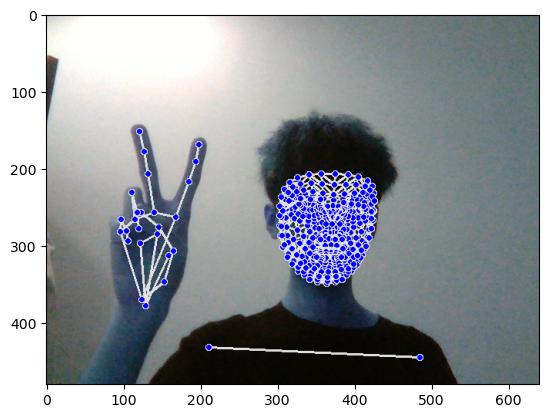

In [8]:
plt.imshow(frame)

Diagram in RGB

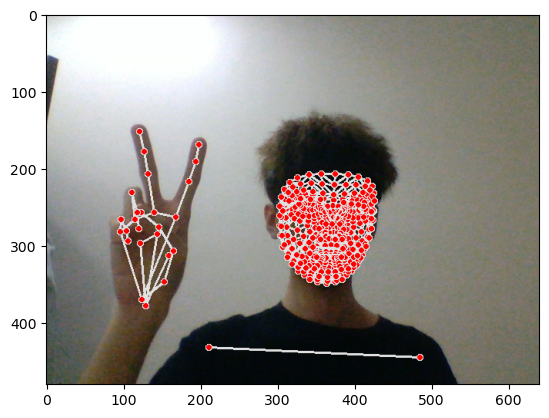

In [9]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

# Extract Keypoints

In [7]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    left_hand = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    right_hand = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, left_hand, right_hand])

In [ ]:
result_test = extract_keypoints(results)

In [12]:
result_test.shape

(1662,)

In [13]:
result_test

array([ 0.58116877,  0.56784242, -0.93573505, ...,  0.16592579,
        0.61396855, -0.04466343])

In [14]:
np.save('1', result_test)

In [6]:
np.load('0.npy')

array([ 0.50233448,  0.37379581, -0.919469  , ...,  0.21275824,
        0.22529507, -0.02828714])

# Data Collection

In [8]:
DATA_PATH = os.path.join('Malay_Sign_Language(BIM)')

actions = np.array(['hello', 'apa khabar', 'maafkan saya', 'terima kasih', 'selamat tinggal', 'memandu dengan selamat', 'kiri', 'kanan', 'kekalkan perubahan', 'lurus', 'nama', 'saya', 'kamu', 'A', 'B', 'C', 'L', 'O'])

# Number of video
no_sequences = 30

# Number of frame
sequence_length = 30

# Folder start
start_folder = 0

Create Sub Folder In Sequence

In [ ]:
for action in actions: 
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

In [ ]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    for action in actions:
        for sequence in range(start_folder, start_folder+no_sequences):
            for frame_num in range(sequence_length):
                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(500)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Close the Screen by enter "q"
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

In [ ]:
cap.release()
cv2.destroyAllWindows()

# Preprocess Data and Create Labels

In [9]:
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

In [10]:
label_map = {label:num for num, label in enumerate(actions)}

In [11]:
label_map

{'hello': 0,
 'apa khabar': 1,
 'maafkan saya': 2,
 'terima kasih': 3,
 'selamat tinggal': 4,
 'memandu dengan selamat': 5,
 'kiri': 6,
 'kanan': 7,
 'kekalkan perubahan': 8,
 'lurus': 9,
 'nama': 10,
 'saya': 11,
 'kamu': 12,
 'A': 13,
 'B': 14,
 'C': 15,
 'L': 16,
 'O': 17}

In [12]:
sequences, labels = [], []
for action in actions:
    for sequence in np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [12]:
np.array(sequences).shape

(540, 30, 1662)

In [13]:
np.array(labels).shape

(540,)

In [13]:
X = np.array(sequences)

In [14]:
y = to_categorical(labels).astype(int)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [15]:
X_train_1 = X_train
y_train_1 = y_train

# GRU Model

In [ ]:
del model

In [33]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, GRU
from keras.callbacks import TensorBoard
from tensorflow.keras.optimizers import Adam
from keras.backend import clear_session
import tensorflow as tf
import json

In [34]:
def create_model_GRU():
    model = Sequential()
    model.add(GRU(18, activation = "tanh", recurrent_activation = "sigmoid", input_shape=(30, 1662)))
    model.add(Dense(18, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics=['categorical_accuracy'])
    return model

In [35]:
epochs_list = [50, 100, 150, 200]
repetitions = 5

for epochs in epochs_list:
    for repeat in range(1, repetitions + 1):
        tf.keras.backend.clear_session()  # Clear previous models from memory.
        
        model = create_model_GRU()
        
        log_dir = os.path.join('Logs', f'Model_GRU_{epochs}_epochs_{repeat}')
        tb_callback = TensorBoard(log_dir=log_dir)
        
        # Fit the model
        print(f"Training GRU model for {epochs} epochs {repeat}...")
        history_GRU = model.fit(X_train_1, y_train_1, epochs=epochs, callbacks=[tb_callback])
        
        history_data = history_GRU.history
        
        # Save the model
        model.save(f'GRU_model_{epochs}_epochs_{repeat}.h5')
        
        # Save the history
        history_filename = f'GRU_{epochs}_history_{repeat}.json'
        with open(history_filename, 'w') as f:
            json.dump(history_data, f)
        
        print(f"Model and history for {epochs} epochs {repeat} saved.")

Training GRU model for 50 epochs 1...
Epoch 1/50
17/17 [==============================] - 3s 39ms/step - loss: 2.9544 - categorical_accuracy: 0.0838
Epoch 2/50
17/17 [==============================] - 1s 38ms/step - loss: 2.7466 - categorical_accuracy: 0.1423
Epoch 3/50
17/17 [==============================] - 1s 39ms/step - loss: 2.6216 - categorical_accuracy: 0.1598
Epoch 4/50
17/17 [==============================] - 1s 36ms/step - loss: 2.5177 - categorical_accuracy: 0.2749
Epoch 5/50
17/17 [==============================] - 1s 37ms/step - loss: 2.3895 - categorical_accuracy: 0.2515
Epoch 6/50
17/17 [==============================] - 1s 37ms/step - loss: 2.3084 - categorical_accuracy: 0.2749
Epoch 7/50
17/17 [==============================] - 1s 41ms/step - loss: 2.1834 - categorical_accuracy: 0.3353
Epoch 8/50
17/17 [==============================] - 1s 37ms/step - loss: 2.1219 - categorical_accuracy: 0.3294
Epoch 9/50
17/17 [==============================] - 1s 38ms/step - loss: 2

In [17]:
from keras.optimizers import Adam
def create_model_GRU():
    model = Sequential()
    model.add(GRU(18, activation = "tanh", recurrent_activation = "sigmoid", input_shape=(30, 1662)))
    model.add(Dense(18, activation='softmax'))
    custom_optimizer = Adam(learning_rate=0.001)
    model.compile(loss='categorical_crossentropy', optimizer = custom_optimizer, metrics=['categorical_accuracy'])
    return model

In [18]:
epochs_list = [50, 100, 150, 200]
repetitions = 5

for epochs in epochs_list:
    for repeat in range(1, repetitions + 1):
        tf.keras.backend.clear_session()  # Clear previous models from memory.
        
        model = create_model_GRU()
        
        log_dir = os.path.join('Logs', f'Model_GRU_{epochs}_epochs_{repeat}_tuned')
        tb_callback = TensorBoard(log_dir=log_dir)
        
        # Fit the model
        print(f"Training GRU model for {epochs} epochs {repeat}...")
        history_GRU = model.fit(X_train_1, y_train_1, epochs=epochs, callbacks=[tb_callback])
        
        history_data = history_GRU.history
        
        # Save the model
        model.save(f'GRU_model_{epochs}_epochs_{repeat}_tuned.h5')
        
        # Save the history
        history_filename = f'GRU_{epochs}_history_{repeat}_tuned.json'
        with open(history_filename, 'w') as f:
            json.dump(history_data, f)
        
        print(f"Model and history for {epochs} epochs {repeat} saved.")

Training GRU model for 50 epochs 1...
Epoch 1/50
17/17 [==============================] - 2s 22ms/step - loss: 2.9702 - categorical_accuracy: 0.0663
Epoch 2/50
17/17 [==============================] - 0s 21ms/step - loss: 2.8055 - categorical_accuracy: 0.1657
Epoch 3/50
17/17 [==============================] - 0s 23ms/step - loss: 2.6733 - categorical_accuracy: 0.1676
Epoch 4/50
17/17 [==============================] - 0s 22ms/step - loss: 2.6419 - categorical_accuracy: 0.1832
Epoch 5/50
17/17 [==============================] - 0s 21ms/step - loss: 2.4648 - categorical_accuracy: 0.2768
Epoch 6/50
17/17 [==============================] - 0s 22ms/step - loss: 2.4157 - categorical_accuracy: 0.2534
Epoch 7/50
17/17 [==============================] - 0s 20ms/step - loss: 2.3550 - categorical_accuracy: 0.3119
Epoch 8/50
17/17 [==============================] - 0s 19ms/step - loss: 2.2354 - categorical_accuracy: 0.2885
Epoch 9/50
17/17 [==============================] - 0s 24ms/step - loss: 2

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 18)                90828     
                                                                 
 dense (Dense)               (None, 18)                342       
                                                                 
Total params: 91,170
Trainable params: 91,170
Non-trainable params: 0
_________________________________________________________________


# Evaluation Metrix (GRU)

In [18]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
import pandas as pd
import tensorflow as tf

epochs_list = [50, 100, 150, 200]
repetitions = 5
all_metrics = []

def predict_with_model(model, X_test):
    return model.predict(X_test)

for epochs in epochs_list:
    for run in range(1, repetitions + 1):
        # Load the model
        model_filename = f'GRU_model_{epochs}_epochs_{run}.h5'
        model = tf.keras.models.load_model(model_filename)
        
        # Make predictions
        yhat = predict_with_model(model, X_test)
        ytrue = np.argmax(y_test, axis=1).tolist()
        yhat = np.argmax(yhat, axis=1).tolist()
        
        # Calculate metrics
        acc = accuracy_score(ytrue, yhat)
        precision = precision_score(ytrue, yhat, average='weighted', zero_division=0)
        recall = recall_score(ytrue, yhat, average='weighted', zero_division=0)
        f1 = f1_score(ytrue, yhat, average='weighted', zero_division=0)
        cm = confusion_matrix(ytrue, yhat)
        
        # Store the metrics
        metrics = {
            'Epochs': epochs,
            'Run': run,
            'Accuracy': acc,
            'Precision': precision,
            'Recall': recall,
            'F1 Score': f1,
        }
        all_metrics.append(metrics)

# Convert the metrics to a DataFrame
metrics_df = pd.DataFrame(all_metrics)

# Display the metrics in a table
print("\nMetrics Table")
print(metrics_df)

1/1 [==============================] - 1s 534ms/step

Metrics Table
    Epochs  Run  Accuracy  Precision    Recall  F1 Score
0       50    1  0.592593   0.504209  0.592593  0.525438
1       50    2  0.814815   0.757407  0.814815  0.780423
2       50    3  0.629630   0.614198  0.629630  0.605820
3       50    4  0.703704   0.740741  0.703704  0.697531
4       50    5  0.555556   0.638889  0.555556  0.566667
5      100    1  0.740741   0.703704  0.740741  0.719577
6      100    2  0.814815   0.745370  0.814815  0.764310
7      100    3  0.777778   0.692593  0.777778  0.722222
8      100    4  0.814815   0.862963  0.814815  0.812963
9      100    5  0.777778   0.761111  0.777778  0.740300
10     150    1  0.666667   0.626543  0.666667  0.637037
11     150    2  0.407407   0.346708  0.407407  0.361905
12     150    3  0.740741   0.870370  0.740741  0.781481
13     150    4  0.703704   0.725926  0.703704  0.709259
14     150    5  0.629630   0.651235  0.629630  0.605820
15     200    1  0.6

# Evaluation Metrix (GRU Tuned)

In [17]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
import pandas as pd
import tensorflow as tf

epochs_list = [50, 100, 150, 200]
repetitions = 5
all_metrics = []

def predict_with_model(model, X_test):
    return model.predict(X_test)

for epochs in epochs_list:
    for run in range(1, repetitions + 1):
        # Load the model
        model_filename = f'GRU_model_{epochs}_epochs_{run}_tuned.h5'
        model = tf.keras.models.load_model(model_filename)
        
        # Make predictions
        yhat = predict_with_model(model, X_test)
        ytrue = np.argmax(y_test, axis=1).tolist()
        yhat = np.argmax(yhat, axis=1).tolist()
        
        # Calculate metrics
        acc = accuracy_score(ytrue, yhat)
        precision = precision_score(ytrue, yhat, average='weighted', zero_division=0)
        recall = recall_score(ytrue, yhat, average='weighted', zero_division=0)
        f1 = f1_score(ytrue, yhat, average='weighted', zero_division=0)
        cm = confusion_matrix(ytrue, yhat)
        
        # Store the metrics
        metrics = {
            'Epochs': epochs,
            'Run': run,
            'Accuracy': acc,
            'Precision': precision,
            'Recall': recall,
            'F1 Score': f1,
        }
        all_metrics.append(metrics)

# Convert the metrics to a DataFrame
metrics_df = pd.DataFrame(all_metrics)

# Display the metrics in a table
print("\nMetrics Table")
print(metrics_df)

1/1 [==============================] - 1s 560ms/step

Metrics Table
    Epochs  Run  Accuracy  Precision    Recall  F1 Score
0       50    1  0.629630   0.570370  0.629630  0.559924
1       50    2  0.555556   0.508025  0.555556  0.493122
2       50    3  0.703704   0.735185  0.703704  0.706437
3       50    4  0.518519   0.500617  0.518519  0.474868
4       50    5  0.703704   0.622896  0.703704  0.640212
5      100    1  0.629630   0.629630  0.629630  0.629630
6      100    2  0.629630   0.508642  0.629630  0.538936
7      100    3  0.666667   0.599794  0.666667  0.611063
8      100    4  0.777778   0.788360  0.777778  0.751852
9      100    5  0.740741   0.671296  0.740741  0.690236
10     150    1  0.888889   0.930864  0.888889  0.879630
11     150    2  0.777778   0.876543  0.777778  0.783951
12     150    3  0.777778   0.920635  0.777778  0.797531
13     150    4  0.703704   0.709259  0.703704  0.658866
14     150    5  0.592593   0.574074  0.592593  0.580247
15     200    1  0.8

# Confusion Matrix (GRU Tuned)

1/1 [==============================] - 1s 582ms/step

Metrics Table
   Epochs  Run  Accuracy  Precision    Recall  F1 Score  \
0     200    1  0.888889   0.935185  0.888889  0.881658   

                                    Confusion Matrix  
0  [[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...  


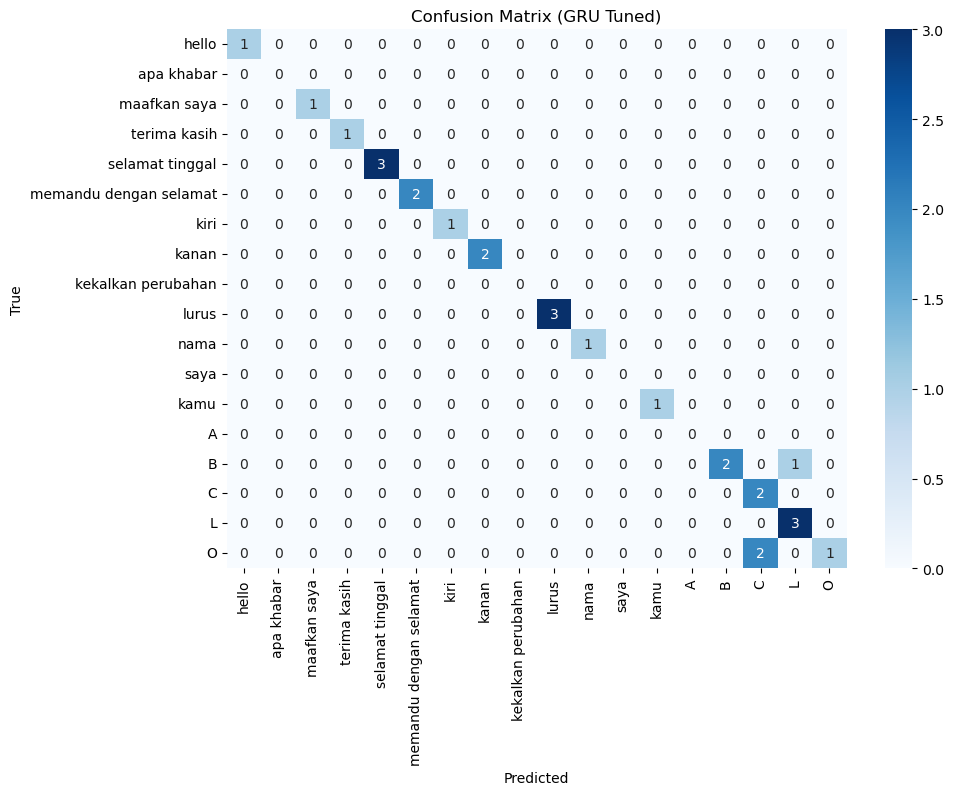

In [20]:
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

epochs_list = [200]
repetitions = 1
all_metrics = []

def predict_with_model(model, X_test):
    return model.predict(X_test)

for epochs in epochs_list:
    for run in range(1, repetitions + 1):
        # Load the model
        model_filename = f'GRU_model_{epochs}_epochs_{run}_tuned.h5'
        model = tf.keras.models.load_model(model_filename)
        
        # Make predictions
        yhat = predict_with_model(model, X_test)
        ytrue = np.argmax(y_test, axis=1).tolist()
        yhat = np.argmax(yhat, axis=1).tolist()
        
        # Calculate metrics
        acc = accuracy_score(ytrue, yhat)
        cm = confusion_matrix(ytrue, yhat, labels=range(len(labels)))  # To include all labels
        precision = precision_score(ytrue, yhat, average='weighted', zero_division=0)
        recall = recall_score(ytrue, yhat, average='weighted', zero_division=0)
        f1 = f1_score(ytrue, yhat, average='weighted', zero_division=0)
        
        # Store the metrics
        metrics = {
            'Epochs': epochs,
            'Run': run,
            'Accuracy': acc,
            'Precision': precision,
            'Recall': recall,
            'F1 Score': f1,
            'Confusion Matrix': cm.tolist()  # Convert to list for better readability in DataFrame
        }
        all_metrics.append(metrics)

# Convert the metrics to a DataFrame
metrics_df = pd.DataFrame(all_metrics)

# Display the metrics in a table
print("\nMetrics Table")
print(metrics_df)

# Plot confusion matrix for the specific model
def plot_confusion_matrix(cm, labels):
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix (GRU Tuned)')
    plt.show()

# List of labels for your classes
labels = ['hello', 'apa khabar', 'maafkan saya', 'terima kasih', 'selamat tinggal', 'memandu dengan selamat', 'kiri', 'kanan', 'kekalkan perubahan', 'lurus', 'nama', 'saya', 'kamu', 'A', 'B', 'C', 'L', 'O'] # Replace with actual class names

# Retrieve the confusion matrix from the metrics DataFrame
conf_matrix = np.array(metrics_df.loc[0, 'Confusion Matrix'])

# Plot the confusion matrix
plot_confusion_matrix(conf_matrix, labels)

# Confution Matrix (GRU)

1/1 [==============================] - 1s 635ms/step

Metrics Table
   Epochs  Run  Accuracy  Precision    Recall  F1 Score  \
0     200    2  0.888889   0.935185  0.888889  0.902646   

                                    Confusion Matrix  
0  [[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...  


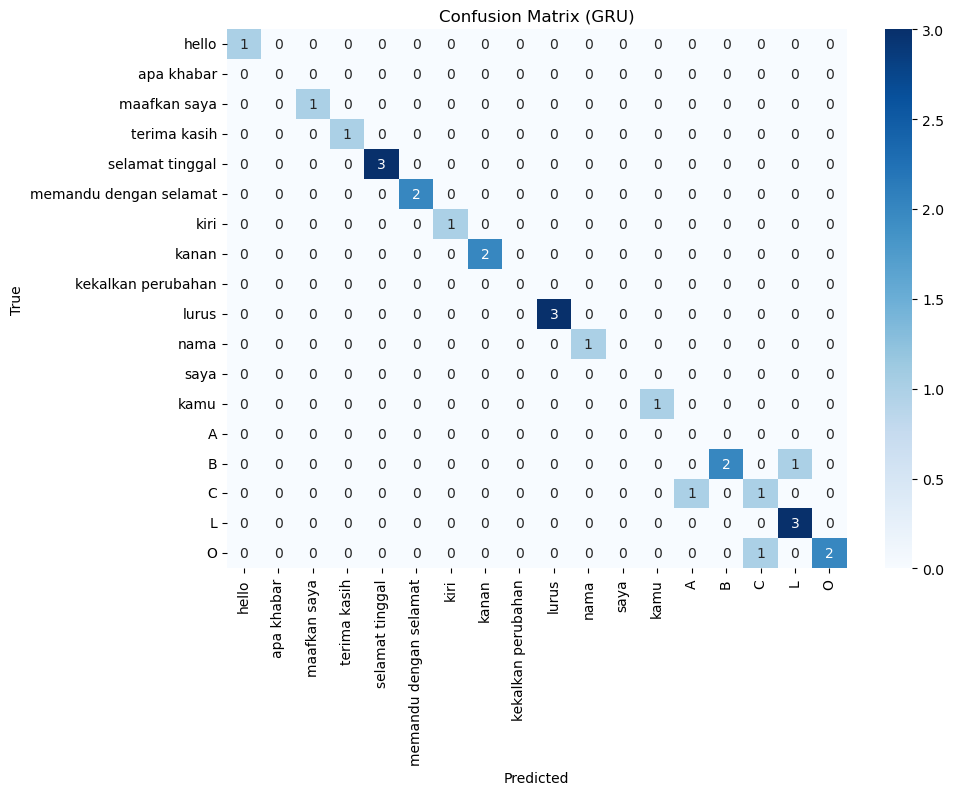

In [22]:
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

epochs_list = [200]
repetitions = 2
all_metrics = []

# Convert y_test to a list of labels if it's one-hot encoded
ytrue = np.argmax(y_test, axis=1).tolist()

def predict_with_model(model, X_test):
    return model.predict(X_test)

for epochs in epochs_list:
    for run in range(2, repetitions + 1):
        # Load the model
        model_filename = f'GRU_model_{epochs}_epochs_{run}.h5'
        model = tf.keras.models.load_model(model_filename)
        
        # Make predictions
        yhat = predict_with_model(model, X_test)
        ytrue = np.argmax(y_test, axis=1).tolist()
        yhat = np.argmax(yhat, axis=1).tolist()
        
        # Calculate metrics
        acc = accuracy_score(ytrue, yhat)
        cm = confusion_matrix(ytrue, yhat, labels=range(len(labels)))  # To include all labels
        precision = precision_score(ytrue, yhat, average='weighted', zero_division=0)
        recall = recall_score(ytrue, yhat, average='weighted', zero_division=0)
        f1 = f1_score(ytrue, yhat, average='weighted', zero_division=0)
        
        # Store the metrics
        metrics = {
            'Epochs': epochs,
            'Run': run,
            'Accuracy': acc,
            'Precision': precision,
            'Recall': recall,
            'F1 Score': f1,
            'Confusion Matrix': cm.tolist()  # Convert to list for better readability in DataFrame
        }
        all_metrics.append(metrics)

# Convert the metrics to a DataFrame
metrics_df = pd.DataFrame(all_metrics)

# Display the metrics in a table
print("\nMetrics Table")
print(metrics_df)

# Plot confusion matrix for the specific model
def plot_confusion_matrix(cm, labels):
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix (GRU)')
    plt.show()

# List of labels for your classes
labels = ['hello', 'apa khabar', 'maafkan saya', 'terima kasih', 'selamat tinggal', 'memandu dengan selamat', 'kiri', 'kanan', 'kekalkan perubahan', 'lurus', 'nama', 'saya', 'kamu', 'A', 'B', 'C', 'L', 'O'] # Replace with actual class names

# Retrieve the confusion matrix from the metrics DataFrame
conf_matrix = np.array(metrics_df.loc[0, 'Confusion Matrix'])

# Plot the confusion matrix
plot_confusion_matrix(conf_matrix, labels)

# LSTM Model

In [63]:
del model

In [35]:
from keras.optimizers import Adam
def create_model_LSTM():
    model = Sequential()
    model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
    model.add(LSTM(128, return_sequences=True, activation='relu'))
    model.add(LSTM(64, return_sequences=False, activation='relu'))
    model.add(Dense(256, activation='relu'))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(actions.shape[0], activation='softmax'))
    model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])
    return model

In [36]:
epochs_list = [50, 100, 150, 200]
repetitions = 5

for epochs in epochs_list:
    for repeat in range(1, repetitions + 1):
        tf.keras.backend.clear_session()  # Clear previous models from memory.
        
        model = create_model_LSTM()
        
        log_dir = os.path.join('Logs', f'Model_LSTM_{epochs}_epochs_{repeat}')
        tb_callback = TensorBoard(log_dir=log_dir)
        
        # Fit the model
        print(f"Training LSTM model for {epochs} epochs {repeat}...")
        history_LSTM = model.fit(X_train_1, y_train_1, epochs=epochs, callbacks=[tb_callback])
        
        history_data = history_LSTM.history
        
        # Save the model
        model.save(f'LSTM_model_{epochs}_epochs_{repeat}.h5')
        
        # Save the history
        history_filename = f'LSTM_{epochs}_history_{repeat}.json'
        with open(history_filename, 'w') as f:
            json.dump(history_data, f)
        
        print(f"Model and history for {epochs} epochs {repeat} saved.")

Training LSTM model for 50 epochs 1...
Epoch 1/50
17/17 [==============================] - 9s 292ms/step - loss: 14.0136 - categorical_accuracy: 0.0390
Epoch 2/50
17/17 [==============================] - 5s 316ms/step - loss: 53.7806 - categorical_accuracy: 0.0546
Epoch 3/50
17/17 [==============================] - 6s 330ms/step - loss: 31.4658 - categorical_accuracy: 0.0663
Epoch 4/50
17/17 [==============================] - 6s 372ms/step - loss: 49.8341 - categorical_accuracy: 0.0604
Epoch 5/50
17/17 [==============================] - 6s 354ms/step - loss: 11.0437 - categorical_accuracy: 0.0585
Epoch 6/50
17/17 [==============================] - 5s 318ms/step - loss: 4.7875 - categorical_accuracy: 0.0487
Epoch 7/50
17/17 [==============================] - 5s 289ms/step - loss: 3.1556 - categorical_accuracy: 0.0604
Epoch 8/50
17/17 [==============================] - 6s 330ms/step - loss: 3.2615 - categorical_accuracy: 0.0604
Epoch 9/50
17/17 [==============================] - 7s 397ms

In [24]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
import pandas as pd
import tensorflow as tf

epochs_list = [50, 100, 150, 200]
repetitions = 5
all_metrics = []

def predict_with_model(model, X_test):
    return model.predict(X_test)

for epochs in epochs_list:
    for run in range(1, repetitions + 1):
        # Load the model
        model_filename = f'LSTM_model_{epochs}_epochs_{run}_test.h5'
        model = tf.keras.models.load_model(model_filename)
        
        # Make predictions
        yhat = predict_with_model(model, X_test)
        ytrue = np.argmax(y_test, axis=1).tolist()
        yhat = np.argmax(yhat, axis=1).tolist()
        
        # Calculate metrics
        acc = accuracy_score(ytrue, yhat)
        precision = precision_score(ytrue, yhat, average='weighted', zero_division=0)
        recall = recall_score(ytrue, yhat, average='weighted', zero_division=0)
        f1 = f1_score(ytrue, yhat, average='weighted', zero_division=0)
        
        # Store the metrics
        metrics = {
            'Epochs': epochs,
            'Run': run,
            'Accuracy': acc,
            'Precision': precision,
            'Recall': recall,
            'F1 Score': f1
        }
        all_metrics.append(metrics)

# Convert the metrics to a DataFrame
metrics_df = pd.DataFrame(all_metrics)

# Display the metrics in a table
print("\nMetrics Table")
print(metrics_df)

1/1 [==============================] - 1s 951ms/step

Metrics Table
    Epochs  Run  Accuracy  Precision    Recall  F1 Score
0       50    1  0.407407   0.414815  0.407407  0.395062
1       50    2  0.037037   0.001372  0.037037  0.002646
2       50    3  0.370370   0.300000  0.370370  0.296296
3       50    4  0.074074   0.005487  0.074074  0.010217
4       50    5  0.074074   0.005487  0.074074  0.010217
5      100    1  0.074074   0.005487  0.074074  0.010217
6      100    2  0.296296   0.333333  0.296296  0.308642
7      100    3  0.037037   0.001372  0.037037  0.002646
8      100    4  0.481481   0.537037  0.481481  0.487654
9      100    5  0.037037   0.001372  0.037037  0.002646
10     150    1  0.592593   0.675926  0.592593  0.603704
11     150    2  0.037037   0.001372  0.037037  0.002646
12     150    3  0.296296   0.324074  0.296296  0.292769
13     150    4  0.037037   0.001372  0.037037  0.002646
14     150    5  0.037037   0.001372  0.037037  0.002646
15     200    1  0.1

1/1 [==============================] - 1s 1s/step

Metrics Table
   Epochs  Run  Accuracy  Precision    Recall  F1 Score  \
0     150    1  0.592593   0.675926  0.592593  0.603704   

                                    Confusion Matrix  
0  [[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...  


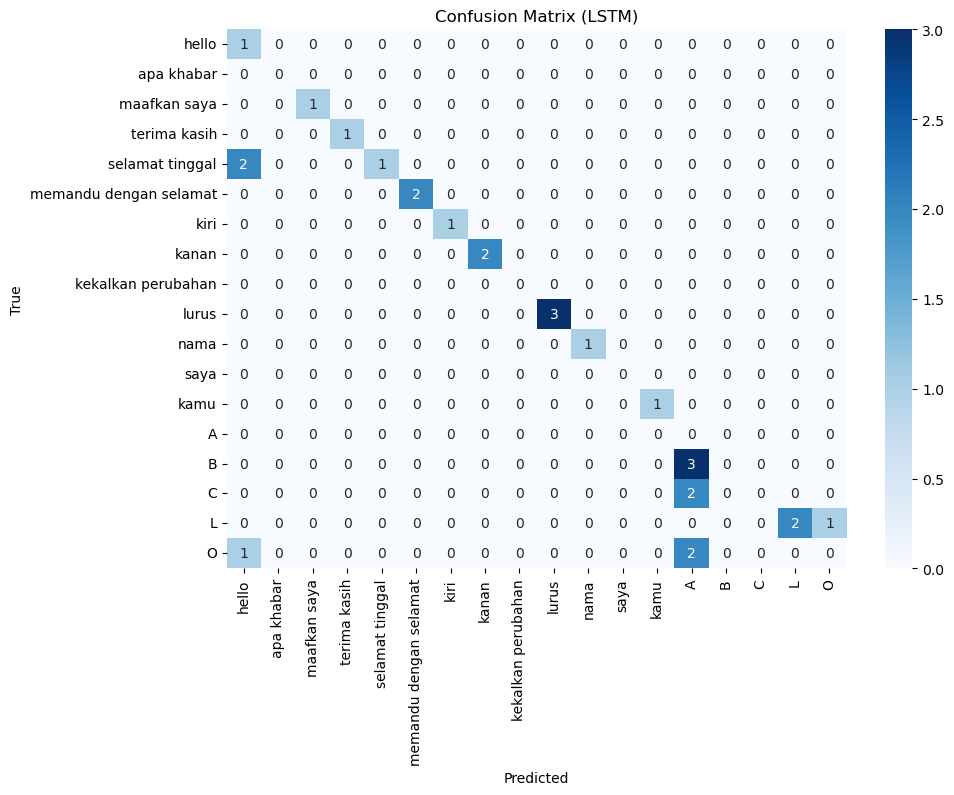

In [26]:
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

epochs_list = [150]
repetitions = 1
all_metrics = []

def predict_with_model(model, X_test):
    return model.predict(X_test)

for epochs in epochs_list:
    for run in range(1, repetitions + 1):
        # Load the model
        model_filename = f'LSTM_model_{epochs}_epochs_{run}_test.h5'
        model = tf.keras.models.load_model(model_filename)
        
        # Make predictions
        yhat = predict_with_model(model, X_test)
        ytrue = np.argmax(y_test, axis=1).tolist()
        yhat = np.argmax(yhat, axis=1).tolist()
        
        # Calculate metrics
        acc = accuracy_score(ytrue, yhat)
        cm = confusion_matrix(ytrue, yhat, labels=range(len(labels)))  # To include all labels
        precision = precision_score(ytrue, yhat, average='weighted', zero_division=0)
        recall = recall_score(ytrue, yhat, average='weighted', zero_division=0)
        f1 = f1_score(ytrue, yhat, average='weighted', zero_division=0)
        
        # Store the metrics
        metrics = {
            'Epochs': epochs,
            'Run': run,
            'Accuracy': acc,
            'Precision': precision,
            'Recall': recall,
            'F1 Score': f1,
            'Confusion Matrix': cm.tolist()  # Convert to list for better readability in DataFrame
        }
        all_metrics.append(metrics)

# Convert the metrics to a DataFrame
metrics_df = pd.DataFrame(all_metrics)

# Display the metrics in a table
print("\nMetrics Table")
print(metrics_df)

# Plot confusion matrix for the specific model
def plot_confusion_matrix(cm, labels):
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix (LSTM)')
    plt.show()

# List of labels for your classes
labels = ['hello', 'apa khabar', 'maafkan saya', 'terima kasih', 'selamat tinggal', 'memandu dengan selamat', 'kiri', 'kanan', 'kekalkan perubahan', 'lurus', 'nama', 'saya', 'kamu', 'A', 'B', 'C', 'L', 'O'] # Replace with actual class names

# Retrieve the confusion matrix from the metrics DataFrame
conf_matrix = np.array(metrics_df.loc[0, 'Confusion Matrix'])

# Plot the confusion matrix
plot_confusion_matrix(conf_matrix, labels)

In [68]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 64)            442112    
                                                                 
 lstm_1 (LSTM)               (None, 30, 128)           98816     
                                                                 
 lstm_2 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 256)               16640     
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 18)                1

# GRU VS LSTM

In [3]:
with open('GRU_200_history_2.json', 'r') as f:
    history_GRU = json.load(f)

In [4]:
with open('LSTM_200_history_3_test.json', 'r') as f:
    history_LSTM = json.load(f)

In [5]:
with open('GRU_200_history_1_tuned.json', 'r') as f:
    history_GRU_tuned = json.load(f)

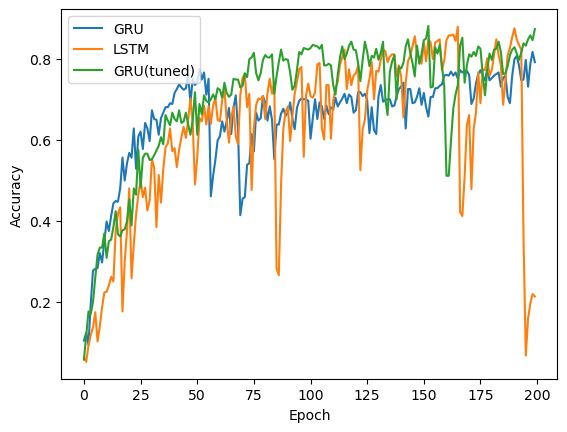

In [6]:
plt.plot(history_GRU['categorical_accuracy'])
plt.plot(history_LSTM['categorical_accuracy'])
plt.plot(history_GRU_tuned['categorical_accuracy'])
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(['GRU', 'LSTM', 'GRU(tuned)'], loc='upper left')
plt.show()

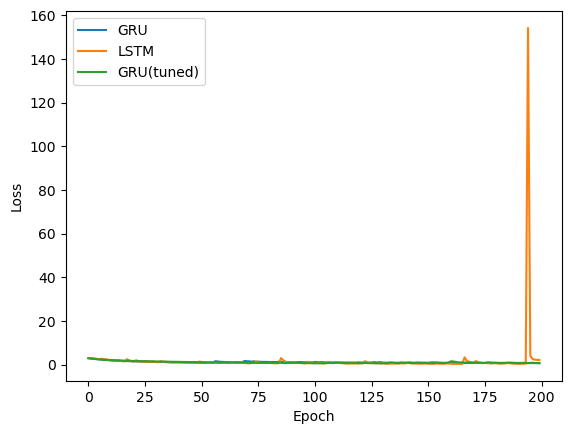

In [7]:
plt.plot(history_GRU['loss'])
plt.plot(history_LSTM['loss'])
plt.plot(history_GRU_tuned['loss'])
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(['GRU', 'LSTM', 'GRU(tuned)'], loc='upper left')
plt.show()